# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
# Memuat Dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/Dataset_hasil_Clustering.csv')

df.head()

,provinsi,daerah,jenis,tahun,belanja,belanja_kategori,cluster
0,ACEH,PERDESAAN,MAKANAN,2007.0,195176.0,Rendah,2
1,ACEH,PERDESAAN,MAKANAN,2008.0,218781.0,Rendah,2
2,ACEH,PERDESAAN,MAKANAN,2009.0,247427.0,Rendah,2
3,ACEH,PERDESAAN,MAKANAN,2010.0,275749.0,Rendah,2
4,ACEH,PERDESAAN,MAKANAN,2011.0,308000.0,Rendah,2


In [5]:
# Melakukan One-Hot Encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['provinsi', 'jenis', 'daerah', 'belanja_kategori'])

# Memisahkan fitur (X) dan label (y) setelah encoding
X = df_encoded.drop(columns=['cluster'])
y = df_encoded['cluster']

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Memisahkan dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 3590
Jumlah data uji: 898


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# Inisialisasi model Gradient Boosting
model = GradientBoostingClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

print("Model Gradient Boosting berhasil dilatih!")

Model Gradient Boosting berhasil dilatih!


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


=== Evaluasi Model ===
Accuracy: 99.55%
F1-Score: 99.55%
Precision: 99.56%
Recall: 99.55%


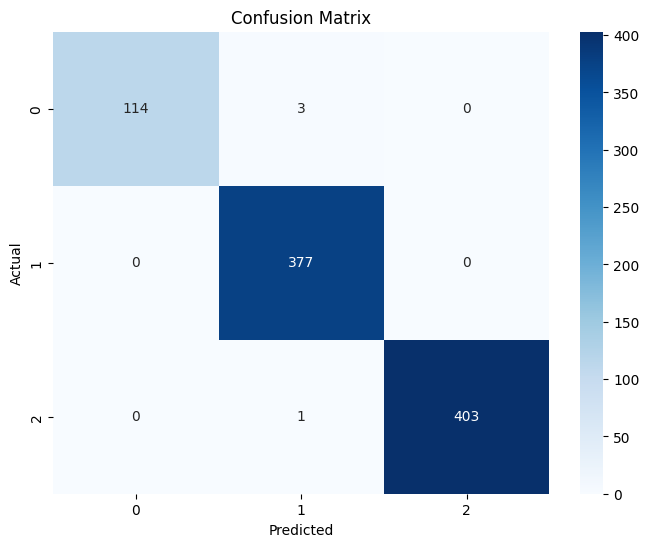


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       117
           1       0.99      1.00      0.99       377
           2       1.00      1.00      1.00       404

    accuracy                           1.00       898
   macro avg       1.00      0.99      0.99       898
weighted avg       1.00      1.00      1.00       898



In [8]:
# 1. Prediksi pada data uji
y_pred = model.predict(X_test)

# 2. Hitung metrik evaluasi
print("\n=== Evaluasi Model ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2%}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2%}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2%}")

# 3. Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Classification Report (Detail per kelas)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


=== Hasil Evaluasi pada Test Set ===
Akurasi: 99.55%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       117
           1       0.99      1.00      0.99       377
           2       1.00      1.00      1.00       404

    accuracy                           1.00       898
   macro avg       1.00      0.99      0.99       898
weighted avg       1.00      1.00      1.00       898



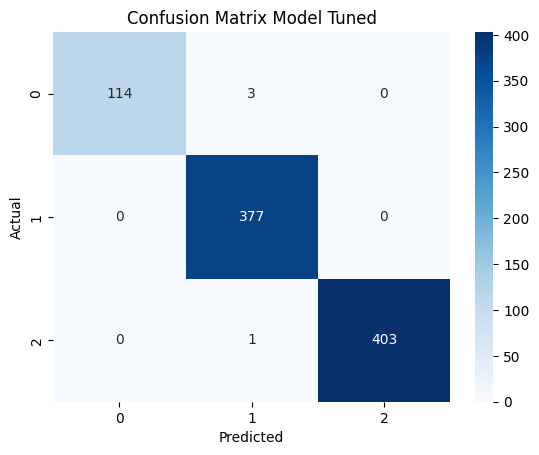

In [10]:
# Gunakan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Prediksi pada data test
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Hasil Evaluasi pada Test Set ===")
print(f"Akurasi: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Model Tuned')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Model default sebelum tuning
base_model = GradientBoostingClassifier(random_state=42)
base_model.fit(X_train, y_train)
base_accuracy = accuracy_score(y_test, base_model.predict(X_test))

print("\n=== Perbandingan Performa ===")
print(f"Akurasi Sebelum Tuning: {base_accuracy:.2%}")
print(f"Akurasi Setelah Tuning: {accuracy:.2%}")
print(f"Peningkatan Akurasi: {accuracy - base_accuracy:.2%} poin")


=== Perbandingan Performa ===
Akurasi Sebelum Tuning: 99.55%
Akurasi Setelah Tuning: 99.55%
Peningkatan Akurasi: 0.00% poin


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Perbandingan Sebelum dan Setelah Tuning:

- Akurasi tidak berubah (99.55%). Tuning tidak memberikan dampak signifikan.

2. Kelemahan Model:

- Precision & Recall
Semua kelas memiliki skor precision dan recall yang sangat tinggi, menunjukkan bahwa model mampu melakukan klasifikasi dengan sangat baik.

- Overfitting?
Performanya yang sangat tinggi dapat mengindikasikan adanya potensi overfitting. Namun, hasil evaluasi pada data uji yang konsisten dengan performa di data latih menunjukkan bahwa kemungkinan underfitting sangat kecil.

3. Rekomendasi Tindakan Lanjutan:

- Kumpulkan data tambahan atau gunakan oversampling untuk kelas minoritas.

- Coba algoritma lain seperti Random Forest atau XGBoost.